In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 25

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
67/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0826 - loss: 3.2104
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0865 - loss: 3.1573 - val_accuracy: 0.1047 - val_loss: 2.5682
Epoch 2/1000
86/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1274 - loss: 2.4791
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1289 - loss: 2.4738 - val_accuracy: 0.2102 - val_loss: 2.1123
Epoch 3/1000
70/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1990 - loss: 2.1660
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2010 - loss: 2.1569 - val_accuracy: 0.2341 - val_loss: 1.9798
Epoch 4/1000
84/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2528 - loss: 2.0242
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
89/

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9405 - loss: 0.4594


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[3.76046775e-03 5.88046312e-01 3.84397022e-02 1.28998235e-02
 2.03558162e-01 1.52259171e-01 3.94794206e-08 2.20651543e-07
 1.03604572e-03 8.41762962e-15 9.24560125e-13 2.09805114e-13
 1.01911235e-14 3.52387130e-12 3.38458493e-12 9.82358319e-14
 1.00862793e-13 3.08975969e-14 3.42446693e-13 2.34451266e-13
 1.69815464e-11 1.17907040e-13 1.12784416e-13 9.09653321e-13
 2.05016256e-12]
1


# Confusion matrix

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


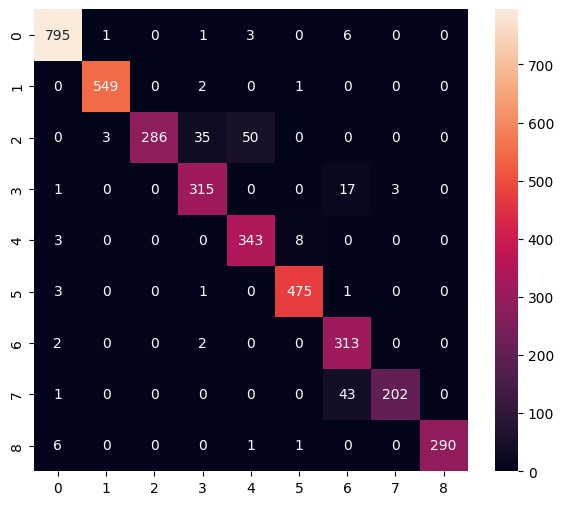

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       806
           1       0.99      0.99      0.99       552
           2       1.00      0.76      0.87       374
           3       0.88      0.94      0.91       336
           4       0.86      0.97      0.91       354
           5       0.98      0.99      0.98       480
           6       0.82      0.99      0.90       317
           7       0.99      0.82      0.90       246
           8       1.00      0.97      0.99       298

    accuracy                           0.95      3763
   macro avg       0.95      0.94      0.94      3763
weighted avg       0.95      0.95      0.95      3763



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\joshu\AppData\Local\Temp\tmp5gk_vb84\assets


INFO:tensorflow:Assets written to: C:\Users\joshu\AppData\Local\Temp\tmp5gk_vb84\assets


Saved artifact at 'C:\Users\joshu\AppData\Local\Temp\tmp5gk_vb84'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 25), dtype=tf.float32, name=None)
Captures:
  1922838602496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922838620112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922858809648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922859137680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922819974592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922858740368: TensorSpec(shape=(), dtype=tf.resource, name=None)


7480

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\joshu\OneDrive\Desktop\hand-gesture-recognition-mediapipe-main\hand_env\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.76046286e-03 5.88046670e-01 3.84396836e-02 1.28998281e-02
 2.03557998e-01 1.52259052e-01 3.94794384e-08 2.20651671e-07
 1.03604433e-03 8.41765080e-15 9.24562293e-13 2.09805643e-13
 1.01911472e-14 3.52387325e-12 3.38459339e-12 9.82362588e-14
 1.00863037e-13 3.08975562e-14 3.42446855e-13 2.34451401e-13
 1.69815880e-11 1.17907555e-13 1.12784903e-13 9.09653863e-13
 2.05016364e-12]
1
